In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def fact(n):
    if n <= 1:
        return 1
    return n * fact(n-1)

In [3]:
fact(1)

1

In [4]:
fact(2)

2

In [5]:
fact(3)

6

# Here we will look at the solutions to Airy's equation.

## Airy's equation looks like 
$y'' -xy=0$ (renders in $\LaTeX$)
(look at [codecogs](https://editor.codecogs.com))

To remind ourselves, the solutions to Airy's equation have the recurrence relation

$ (n+2)(n+1)a_{n+2} = a_{n-1} $

or

$ (n+3)(n+2)a_{n+3} = a_n $

or $a_{n+3} = \frac{a_n}{(n+3)(n+2)}$

or finally

$a_{n} = \frac{a_{n-3}}{(n)(n-1)}$

In [7]:
def a(n):
    if n < 0:
        return -1
    elif n == 2:
        return 0
    elif n in (0,1):
        return 1
    else:
        return a(n-3)/(n*(n-1))

In [8]:
a(4), 1/(4*3)

(0.08333333333333333, 0.08333333333333333)

In [18]:
a(5),0

(0.0, 0)

In [19]:
a(6),1/(2*3*5*6)

(0.005555555555555555, 0.005555555555555556)

In [20]:
a(7),1/(3*4*6*7)

(0.001984126984126984, 0.001984126984126984)

In [21]:
a(8),0

(0.0, 0)

In [22]:
a(9),1/(2*3*5*6*8*9)

(7.716049382716048e-05, 7.716049382716049e-05)

In [9]:
a(20)

0.0

In [10]:
a(21)

2.165863366310623e-14

In [11]:
def airy1(x,nterms):
    """Coefficients a0, a3, a6, ...
    """
    result = 0
    for i in range(nterms):
        n = i * 3
        result = result + a(n)*x**n # definition of power series
        #print(f"I am using i {i} and n {n}")
    return result
def airy2(x,nterms):
    """Coefficients a1, a4, a7, ...
    """
    result = 0
    for i in range(nterms):
        n = 1 + i * 3
        result = result + a(n)*x**n # definition of power series
        #print(f"I am using i {i} and n {n}")
    return result

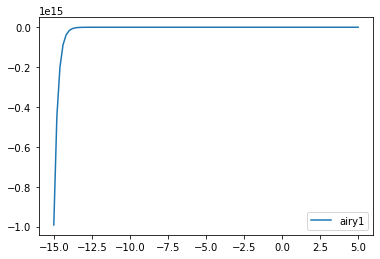

In [23]:
x = np.linspace(-15,5,100) # linearly (evenly) spaced points from 0 to 5. 100 of them
plt.plot(x,airy1(x=x,nterms=20),label='airy1')
plt.legend()

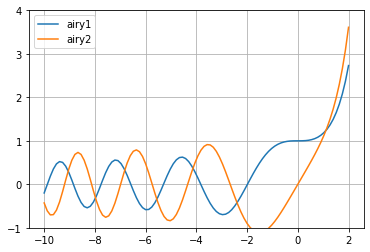

In [46]:
from scipy import special
x = np.linspace(-10,2,100) # linearly (evenly) spaced points from 0 to 5. 100 of them

nterms = 100
ai, aip, bi, bip = special.airy(x)
plt.plot(x,airy1(x=x,nterms=nterms),label='airy1')
plt.plot(x,airy2(x=x,nterms=nterms),label='airy2')
#plt.plot(x, ai, 'r', label='Ai(x)')
#plt.plot(x, bi, 'b--', label='Bi(x)')
#plt.plot(x,aip,'k-',label='aip')
#plt.plot(x,bip,'k--',label='bip')
plt.ylim(-1, 4.0)
plt.grid()
plt.legend()